In [12]:
#%% packages
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 
import seaborn as sns
import numpy as np
from collections import Counter
import seaborn as sns
# %% data prep

X, y = make_multilabel_classification(n_samples=10000, n_features=10, n_classes=3, n_labels=2)
X_torch = torch.FloatTensor(X)
y_torch = torch.FloatTensor(y)


# %% train test split
X_train, X_test, y_train, y_test = train_test_split(X_torch, y_torch, test_size = 0.2)


# display size of train and test with description
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: torch.Size([8000, 10]), y_train: torch.Size([8000, 3]), X_test: torch.Size([2000, 10]), y_test: torch.Size([2000, 3])


In [13]:
class MultiLabelDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [14]:
class MultiLabelNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiLabelNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


In [16]:
# Create dataset
train_dataset = MultiLabelDataset(X_train, y_train)
test_dataset = MultiLabelDataset(X_test, y_test)

# DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Model
model = MultiLabelNN(input_size=10, num_classes=3)

# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(300):  # number of epochs
    for i, (inputs, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/10], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.3611
Epoch [2/10], Loss: 0.3482
Epoch [3/10], Loss: 0.3959
Epoch [4/10], Loss: 0.3557
Epoch [5/10], Loss: 0.4004
Epoch [6/10], Loss: 0.2788
Epoch [7/10], Loss: 0.3139
Epoch [8/10], Loss: 0.4050
Epoch [9/10], Loss: 0.3021
Epoch [10/10], Loss: 0.2362
Epoch [11/10], Loss: 0.3246
Epoch [12/10], Loss: 0.3567
Epoch [13/10], Loss: 0.3054
Epoch [14/10], Loss: 0.2838
Epoch [15/10], Loss: 0.2674
Epoch [16/10], Loss: 0.3931
Epoch [17/10], Loss: 0.2799
Epoch [18/10], Loss: 0.2559
Epoch [19/10], Loss: 0.4075
Epoch [20/10], Loss: 0.2939
Epoch [21/10], Loss: 0.3295
Epoch [22/10], Loss: 0.2357
Epoch [23/10], Loss: 0.3243
Epoch [24/10], Loss: 0.3096
Epoch [25/10], Loss: 0.3207
Epoch [26/10], Loss: 0.3278
Epoch [27/10], Loss: 0.2505
Epoch [28/10], Loss: 0.3239
Epoch [29/10], Loss: 0.3503
Epoch [30/10], Loss: 0.3876
Epoch [31/10], Loss: 0.2681
Epoch [32/10], Loss: 0.3610
Epoch [33/10], Loss: 0.3034
Epoch [34/10], Loss: 0.3771
Epoch [35/10], Loss: 0.3214
Epoch [36/10], Loss: 0.3257
E

In [18]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = outputs > 0.5  # threshold to convert probabilities to binary predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 253.00%


In [5]:
y_train

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 0., 1.],
        ...,
        [1., 0., 1.],
        [1., 0., 1.],
        [1., 0., 1.]])

In [6]:
# %% model
# topology: fc1, relu, fc2
# final activation function??
class MultilabelNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MultilabelNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

input_dim = X_torch.shape[1]
output_dim = y_torch.shape[1]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MultilabelNetwork(input_size=input_dim, hidden_size=20, output_size=output_dim)
model = model.to(device)  # Move model to GPU
model.train()


MultilabelNetwork(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=3, bias=True)
  (sigmoid): Sigmoid()
)

Epoch 0, Loss: 0.5822099447250366
Epoch 10, Loss: 0.5857479572296143
Epoch 20, Loss: 0.5858893394470215
Epoch 30, Loss: 0.6094378232955933
Epoch 40, Loss: 0.5871385335922241
Epoch 50, Loss: 0.5853399634361267
Epoch 60, Loss: 0.5996173024177551
Epoch 70, Loss: 0.6066036820411682
Epoch 80, Loss: 0.5895559191703796
Epoch 90, Loss: 0.6094780564308167


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

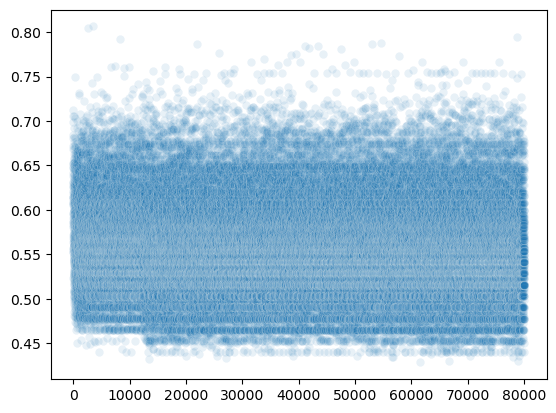

In [10]:
# %% train the model
model.train()

# %%
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
train_losses = []
number_epochs = 100

for epoch in range(number_epochs):
    for j, data in enumerate(train_loader):
        data = [d.to(device) for d in data]  # Move data to GPU

        # optimization
        optimizer.zero_grad()

        # forward pass
        y_hat = model(data[0])

        # compute loss
        loss = loss_fn(y_hat, data[1])
        train_losses.append(loss.item())

        # backprop
        loss.backward()

        # update weights
        optimizer.step()
    
    if (epoch % 10 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")

# %% plot training losses
sns.scatterplot(x=range(len(train_losses)), y=train_losses, alpha=0.1)

# %% test the model
X_test_torch = torch.FloatTensor(X_test)
X_test_torch = X_test_torch.to(device)  # Move test data to GPU
with torch.no_grad():
    y_test_hat = model(X_test_torch).round()

# %% Test accuracy
test_acc = accuracy_score(y_test, y_test_hat)
print(f"Test accuracy: {test_acc * 100}%")


In [8]:


# %% dataset and dataloader
class MultilabelDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

multilabel_data = MultilabelDataset(X_train, y_train)
train_loader = DataLoader(dataset = multilabel_data, batch_size=10)


Epoch 0, Loss: 0.5830038785934448
Epoch 10, Loss: 0.577423632144928
Epoch 20, Loss: 0.5390722155570984
Epoch 30, Loss: 0.5813723206520081
Epoch 40, Loss: 0.5586972832679749
Epoch 50, Loss: 0.6133448481559753
Epoch 60, Loss: 0.5617033839225769
Epoch 70, Loss: 0.5719744563102722
Epoch 80, Loss: 0.57469242811203
Epoch 90, Loss: 0.5870317816734314
Naive classifier: 21.45%


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

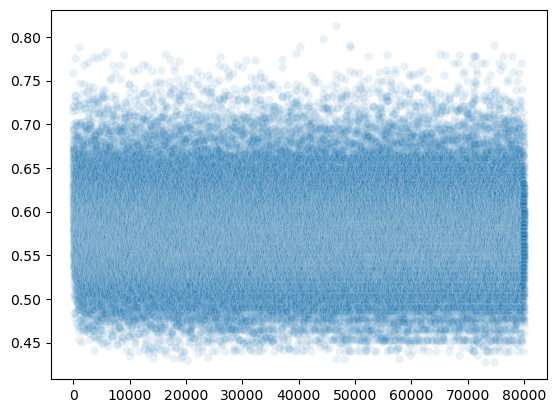

In [16]:
# %% model
# topology: fc1, relu, fc2
# final activation function??
class MultilabelNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MultilabelNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

input_dim = X_torch.shape[1]
output_dim = y_torch.shape[1]

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = MultilabelNetwork(input_size=input_dim, hidden_size=20, output_size=output_dim)
model = model.to(device)  # Move model to GPU
model.train()

# %%
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
losses = []
slope, bias = [], []
number_epochs = 100
for epoch in range(number_epochs):
    for j, data in enumerate(train_loader):
        data = [d.to(device) for d in data]  # Move data to GPU

        # optimization
        optimizer.zero_grad()

        # forward pass
        y_hat = model(data[0])

        # compute loss
        loss = loss_fn(y_hat, data[1])
        losses.append(loss.item())

        # backprop
        loss.backward()

        # update weights
        optimizer.step()
    
    if (epoch % 10 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")

# %% losses
sns.scatterplot(x=range(len(losses)), y=losses, alpha=0.1)

# %% test the model
X_test_torch = torch.FloatTensor(X_test)
X_test_torch = X_test_torch.to(device)  # Move test data to GPU
with torch.no_grad():
    y_test_hat = model(X_test_torch).round()
    
# %% Naive classifier accuracy
# convert [1, 1, 0] to string '[1. 1. 0.]'
y_test_str = [str(i) for i in y_test.detach().numpy()]
y_test_str

most_common_cnt = Counter(y_test_str).most_common()[0][1]
print(f"Naive classifier: {most_common_cnt/len(y_test_str) * 100}%")

# %% Test accuracy
test_acc = accuracy_score(y_test, y_test_hat)
print(f"Test accuracy: {test_acc * 100}%")


Epoch 0, Loss: 0.5427905917167664
Epoch 10, Loss: 0.4712333679199219
Epoch 20, Loss: 0.4401840567588806
Epoch 30, Loss: 0.43989047408103943
Epoch 40, Loss: 0.4653944969177246
Epoch 50, Loss: 0.44339439272880554
Epoch 60, Loss: 0.45255085825920105
Epoch 70, Loss: 0.43989020586013794
Epoch 80, Loss: 0.45255306363105774
Epoch 90, Loss: 0.45255306363105774
Naive classifier: 21.55%
Test accuracy: 70.8%


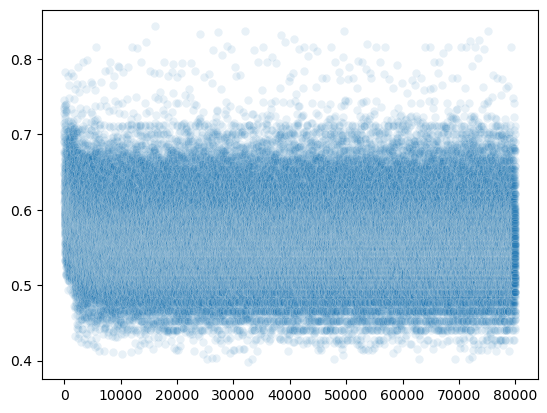

In [11]:
#%% packages
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 
import seaborn as sns
import numpy as np
from collections import Counter
# %% data prep
X, y = make_multilabel_classification(n_samples=10000, n_features=10, n_classes=3, n_labels=2)
X_torch = torch.FloatTensor(X)
y_torch = torch.FloatTensor(y)

# %% train test split
X_train, X_test, y_train, y_test = train_test_split(X_torch, y_torch, test_size = 0.2)


# %% dataset and dataloader
class MultilabelDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

multilabel_data = MultilabelDataset(X_train, y_train)
train_loader = DataLoader(dataset = multilabel_data, batch_size=10)


# %% model
# topology: fc1, relu, fc2
# final activation function??
class MultilabelNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MultilabelNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

input_dim = X_torch.shape[1]
output_dim = y_torch.shape[1]
model = MultilabelNetwork(input_size=input_dim, hidden_size=20, output_size=output_dim)
model.train()
# %%
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
losses = []
slope, bias = [], []
number_epochs = 100
for epoch in range(number_epochs):
    for j, data in enumerate(train_loader):
        
        # optimization
        optimizer.zero_grad()

        # forward pass
        y_hat = model(data[0])

        # compute loss
        loss = loss_fn(y_hat, data[1])
        losses.append(loss.item())

        # backprop
        loss.backward()

        # update weights
        optimizer.step()
    
    if (epoch % 10 == 0):
        print(f"Epoch {epoch}, Loss: {loss.data}")

# %% losses
sns.scatterplot(x=range(len(losses)), y=losses, alpha=0.1)

# %% test the model
X_test_torch = torch.FloatTensor(X_test)
with torch.no_grad():
    y_test_hat = model(X_test_torch).round()
    

#%% Naive classifier accuracy
# convert [1, 1, 0] to string '[1. 1. 0.]'
y_test_str = [str(i) for i in y_test.detach().numpy()]
y_test_str

most_common_cnt = Counter(y_test_str).most_common()[0][1]
print(f"Naive classifier: {most_common_cnt/len(y_test_str) * 100}%")

# %% Test accuracy
test_acc = accuracy_score(y_test, y_test_hat)
print(f"Test accuracy: {test_acc * 100}%")
